In [9]:
import yfinance as yf
dat = yf.Ticker("MSFT")

In [10]:
dat = yf.Ticker("MSFT")
dat.info
dat.calendar
dat.analyst_price_targets
dat.quarterly_income_stmt
dat.history(period='1mo')
dat.option_chain(dat.options[0]).calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,MSFT250523C00230000,2025-05-14 18:38:26+00:00,230.0,221.80,227.50,228.30,0.000000,0.000000,750.0,0,0.000010,True,REGULAR,USD
1,MSFT250523C00240000,2025-04-16 16:12:37+00:00,240.0,138.47,212.45,216.10,0.000000,0.000000,NaN,0,0.000010,True,REGULAR,USD
2,MSFT250523C00250000,2025-05-19 14:02:58+00:00,250.0,207.25,207.75,208.50,1.919998,0.935079,3.0,1,0.000010,True,REGULAR,USD
3,MSFT250523C00255000,2025-05-05 15:37:30+00:00,255.0,181.93,202.60,203.40,0.000000,0.000000,1.0,0,0.000010,True,REGULAR,USD
4,MSFT250523C00260000,2025-05-05 14:50:11+00:00,260.0,177.23,197.70,198.50,0.000000,0.000000,2.0,2,0.000010,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,MSFT250523C00525000,2025-05-19 14:09:43+00:00,525.0,0.01,0.00,0.01,0.000000,0.000000,15.0,17,0.382819,False,REGULAR,USD
75,MSFT250523C00530000,2025-05-15 14:20:43+00:00,530.0,0.01,0.00,0.01,0.000000,0.000000,NaN,1,0.414068,False,REGULAR,USD
76,MSFT250523C00540000,2025-05-14 15:31:19+00:00,540.0,0.01,0.00,0.01,0.000000,0.000000,11.0,18,0.460943,False,REGULAR,USD
77,MSFT250523C00550000,2025-05-15 13:40:20+00:00,550.0,0.02,0.00,0.01,0.000000,0.000000,2.0,105,0.507817,False,REGULAR,USD


In [11]:
from data_fetch import get_price
start = '2024-01-01'
end = '2025-01-01'
prices = get_price(['AAPL', 'MSFT'], start, end)
prices

[*********************100%***********************]  2 of 2 completed


Price            Close                    High                     Low  \
Ticker            AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
2024-01-02  184.290405  366.707367  187.070052  371.680909  182.553128   
2024-01-03  182.910507  366.440460  184.528662  369.070608  182.096461   
2024-01-04  180.587540  363.810272  181.758954  368.912360  179.565029   
2024-01-05  179.862839  363.622406  181.431354  367.884029  178.860187   
2024-01-08  184.210983  370.484528  184.250701  370.988813  180.180502   
...                ...         ...         ...         ...         ...   
2024-12-24  257.578674  437.647400  257.588630  437.916385  254.675658   
2024-12-26  258.396667  436.432068  259.474086  439.251246  257.010028   
2024-12-27  254.974930  428.881104  258.077462  433.553144  252.451019   
2024-12-30  251.593094  423.202911  252.889969  425.912495  250.146586   
2024-12-31  249.817383  419.885681  252.670501  425.095662  248.829760   

Price                         Open                Volume            
Ticker            MSFT        AAPL        MSFT      AAPL      MSFT  
Date                                                                
2024-01-02  362.653379  185.789422  369.663798  82488700  25258600  
2024-01-03  364.373922  182.880727  364.868310  58414500  23083500  
2024-01-04  363.048926  180.825785  366.509642  71983600  20901500  
2024-01-05  362.386436  180.666963  364.828714  62303300  20987000  
2024-01-08  364.868286  180.766209  365.155010  59144500  23134000  
...                ...         ...         ...       ...       ...  
2024-12-24  432.527101  254.875189  432.985331  23234700   7164500  
2024-12-26  434.957756  257.568678  437.398354  27237100   8194200  
2024-12-27  424.717120  257.209530  432.935523  42355300  18117700  
2024-12-30  420.284140  251.623020  424.428211  35557500  13158700  
2024-12-31  419.048902  251.832526  424.468070  39480700  13246500  

[252 rows x 10 columns]

In [12]:
#setting pandas to display floats with 2 decimal places
import pandas as pd

# Set pandas to display floats with 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

In [13]:
prices['Close']

Ticker,AAPL,MSFT
Date,,
2024-01-02,184.29,366.71
2024-01-03,182.91,366.44
2024-01-04,180.59,363.81
2024-01-05,179.86,363.62
2024-01-08,184.21,370.48
...,...,...
2024-12-24,257.58,437.65
2024-12-26,258.40,436.43
2024-12-27,254.97,428.88


In [14]:
from data_fetch import get_price
from portfolio import Portfolio
from plotter import plot_prices

shares = ['AAPL', 'MSFT']

portfolio = Portfolio()
for symbol in shares:
    portfolio.add_asset(symbol, 1)



start = '2024-01-01'
end = '2025-01-01'

prices_df = get_price(shares, start, end)
prices_close_df = prices_df['Close']

print("Portfolio Value:", portfolio.get_portfolio_value(prices_close_df))
#plot_prices(prices_close_df)

[*********************100%***********************]  2 of 2 completed

cal. Symbol: AAPL, Amount: 1.0
Value for AAPL: 249.8173828125
cal. Symbol: MSFT, Amount: 1.0
Value for MSFT: 419.88568115234375
Portfolio Value: 669.7030639648438


In [15]:
#1. getting data from yfinance
# Example usage
from data_fetch import get_price
from portfolio import Portfolio
from plotter import plot_prices

shares = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'NVDA', 'NFLX']
num_shares = [1, 1, 1, 1, 1, 1, 1] # Number of shares for each asset
portfolio = Portfolio()
for i, symbol in enumerate(shares):
    portfolio.add_asset(symbol, num_shares[i])




start = '2024-01-01'
end = '2025-01-01'

#prices_df = get_price(shares, start, end)
#prices_df.to_csv('prices.csv', index=True)
# retrieving prices from csv

In [16]:
import pandas as pd
#retrieve data from csv
prices_df = pd.read_csv('prices.csv', parse_dates=True)
prices_df

,Price,Close,Close.1,Close.2,Close.3,Close.4,Close.5,Close.6,High,High.1,...,Open.4,Open.5,Open.6,Volume,Volume.1,Volume.2,Volume.3,Volume.4,Volume.5,Volume.6
0,Ticker,AAPL,AMZN,GOOG,MSFT,NFLX,NVDA,TSLA,AAPL,AMZN,...,NFLX,NVDA,TSLA,AAPL,AMZN,GOOG,MSFT,NFLX,NVDA,TSLA
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-02,184.53207397460938,149.92999267578125,138.902099609375,367.380615234375,468.5,48.14991760253906,248.4199981689453,187.3153662175252,152.3800048828125,...,483.19000244140625,49.22551389912714,250.0800018310547,82488700,47339400,20071900,25258600,5049400,411254000,104654200
3,2024-01-03,183.15037536621094,148.47000122070312,139.69833374023438,367.1131591796875,470.260009765625,47.551143646240234,238.4499969482422,184.77065219734183,151.0500030517578,...,467.32000732421875,47.46717554449256,244.97999572753906,58414500,49425500,18974300,23083500,3443700,320896000,121082600
4,2024-01-04,180.8243408203125,144.57000732421875,137.38926696777344,364.4781799316406,474.6700134277344,47.979984283447266,237.92999267578125,181.99729114451387,147.3800048828125,...,472.9800109863281,47.74906818641796,239.25,71983600,56039800,18253300,20901500,3636500,306535000,102629300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,2024-12-24,257.91644287109375,229.0500030517578,197.34518432617188,438.4508361816406,932.1199951171875,140.2071075439453,462.2799987792969,257.92641115938613,229.13999938964844,...,915.0,139.98712655305678,435.8999938964844,23234700,15007500,6809800,7164500,2320300,105157000,59551800
250,2024-12-26,258.7355041503906,227.0500030517578,196.87571716308594,437.2332763671875,924.1400146484375,139.91712951660156,454.1300048828125,259.81433504408284,228.5,...,928.4000244140625,139.68715493157526,465.1600036621094,27237100,16146700,7907900,8194200,2340300,116205600,76366400
251,2024-12-27,255.30929565429688,223.75,193.81918334960938,429.66845703125,907.5499877929688,136.9973907470703,431.6600036621094,258.41589596104086,226.02999877929688,...,916.010009765625,138.53725762424156,449.5199890136719,42355300,27367100,14693000,18117700,3226200,170582600,82666800
252,2024-12-30,251.9230194091797,221.3000030517578,192.47073364257812,423.9798583984375,900.4299926757812,137.47735595703125,417.4100036621094,253.22159473829512,223.0,...,894.510009765625,134.81759702407376,419.3999938964844,35557500,28321200,12209500,13158700,2203000,167734700,64941000


In [17]:
fil = ['Price', 'Close']
for i,element in enumerate(shares[1:]):
    fil.append('Close'+'.'+str(i+1))
    print(fil)
#filtering the columns to get only the closing prices
prices_close_df = prices_df[fil]
prices_close_df

['Price', 'Close', 'Close.1']
['Price', 'Close', 'Close.1', 'Close.2']
['Price', 'Close', 'Close.1', 'Close.2', 'Close.3']
['Price', 'Close', 'Close.1', 'Close.2', 'Close.3', 'Close.4']
['Price', 'Close', 'Close.1', 'Close.2', 'Close.3', 'Close.4', 'Close.5']
['Price', 'Close', 'Close.1', 'Close.2', 'Close.3', 'Close.4', 'Close.5', 'Close.6']


,Price,Close,Close.1,Close.2,Close.3,Close.4,Close.5,Close.6
0,Ticker,AAPL,AMZN,GOOG,MSFT,NFLX,NVDA,TSLA
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-02,184.53207397460938,149.92999267578125,138.902099609375,367.380615234375,468.5,48.14991760253906,248.4199981689453
3,2024-01-03,183.15037536621094,148.47000122070312,139.69833374023438,367.1131591796875,470.260009765625,47.551143646240234,238.4499969482422
4,2024-01-04,180.8243408203125,144.57000732421875,137.38926696777344,364.4781799316406,474.6700134277344,47.979984283447266,237.92999267578125
...,...,...,...,...,...,...,...,...
249,2024-12-24,257.91644287109375,229.0500030517578,197.34518432617188,438.4508361816406,932.1199951171875,140.2071075439453,462.2799987792969
250,2024-12-26,258.7355041503906,227.0500030517578,196.87571716308594,437.2332763671875,924.1400146484375,139.91712951660156,454.1300048828125
251,2024-12-27,255.30929565429688,223.75,193.81918334960938,429.66845703125,907.5499877929688,136.9973907470703,431.6600036621094
252,2024-12-30,251.9230194091797,221.3000030517578,192.47073364257812,423.9798583984375,900.4299926757812,137.47735595703125,417.4100036621094


In [18]:
column_new = ['Date']
for i,element in enumerate(shares):
    column_new.append(element)
print(column_new)
prices_close_df.columns = column_new
prices_close_df


['Date', 'AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'NVDA', 'NFLX']


,Date,AAPL,MSFT,GOOG,AMZN,TSLA,NVDA,NFLX
0,Ticker,AAPL,AMZN,GOOG,MSFT,NFLX,NVDA,TSLA
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-02,184.53207397460938,149.92999267578125,138.902099609375,367.380615234375,468.5,48.14991760253906,248.4199981689453
3,2024-01-03,183.15037536621094,148.47000122070312,139.69833374023438,367.1131591796875,470.260009765625,47.551143646240234,238.4499969482422
4,2024-01-04,180.8243408203125,144.57000732421875,137.38926696777344,364.4781799316406,474.6700134277344,47.979984283447266,237.92999267578125
...,...,...,...,...,...,...,...,...
249,2024-12-24,257.91644287109375,229.0500030517578,197.34518432617188,438.4508361816406,932.1199951171875,140.2071075439453,462.2799987792969
250,2024-12-26,258.7355041503906,227.0500030517578,196.87571716308594,437.2332763671875,924.1400146484375,139.91712951660156,454.1300048828125
251,2024-12-27,255.30929565429688,223.75,193.81918334960938,429.66845703125,907.5499877929688,136.9973907470703,431.6600036621094
252,2024-12-30,251.9230194091797,221.3000030517578,192.47073364257812,423.9798583984375,900.4299926757812,137.47735595703125,417.4100036621094


In [19]:
#erase rows 0 and 1
prices_close_df = prices_close_df.drop([0, 1])
prices_close_df

,Date,AAPL,MSFT,GOOG,AMZN,TSLA,NVDA,NFLX
2,2024-01-02,184.53207397460938,149.92999267578125,138.902099609375,367.380615234375,468.5,48.14991760253906,248.4199981689453
3,2024-01-03,183.15037536621094,148.47000122070312,139.69833374023438,367.1131591796875,470.260009765625,47.551143646240234,238.4499969482422
4,2024-01-04,180.8243408203125,144.57000732421875,137.38926696777344,364.4781799316406,474.6700134277344,47.979984283447266,237.92999267578125
5,2024-01-05,180.0987091064453,145.24000549316406,136.74232482910156,364.28997802734375,474.05999755859375,49.07856369018555,237.49000549316406
6,2024-01-08,184.4525604248047,149.10000610351562,139.8675079345703,371.1646728515625,485.0299987792969,52.23337936401367,240.4499969482422
...,...,...,...,...,...,...,...,...
249,2024-12-24,257.91644287109375,229.0500030517578,197.34518432617188,438.4508361816406,932.1199951171875,140.2071075439453,462.2799987792969
250,2024-12-26,258.7355041503906,227.0500030517578,196.87571716308594,437.2332763671875,924.1400146484375,139.91712951660156,454.1300048828125
251,2024-12-27,255.30929565429688,223.75,193.81918334960938,429.66845703125,907.5499877929688,136.9973907470703,431.6600036621094
252,2024-12-30,251.9230194091797,221.3000030517578,192.47073364257812,423.9798583984375,900.4299926757812,137.47735595703125,417.4100036621094


In [20]:
prices_close_df.set_index('Date', inplace=True)
prices_close_df

,AAPL,MSFT,GOOG,AMZN,TSLA,NVDA,NFLX
Date,,,,,,,
2024-01-02,184.53207397460938,149.92999267578125,138.902099609375,367.380615234375,468.5,48.14991760253906,248.4199981689453
2024-01-03,183.15037536621094,148.47000122070312,139.69833374023438,367.1131591796875,470.260009765625,47.551143646240234,238.4499969482422
2024-01-04,180.8243408203125,144.57000732421875,137.38926696777344,364.4781799316406,474.6700134277344,47.979984283447266,237.92999267578125
2024-01-05,180.0987091064453,145.24000549316406,136.74232482910156,364.28997802734375,474.05999755859375,49.07856369018555,237.49000549316406
2024-01-08,184.4525604248047,149.10000610351562,139.8675079345703,371.1646728515625,485.0299987792969,52.23337936401367,240.4499969482422
...,...,...,...,...,...,...,...
2024-12-24,257.91644287109375,229.0500030517578,197.34518432617188,438.4508361816406,932.1199951171875,140.2071075439453,462.2799987792969
2024-12-26,258.7355041503906,227.0500030517578,196.87571716308594,437.2332763671875,924.1400146484375,139.91712951660156,454.1300048828125
2024-12-27,255.30929565429688,223.75,193.81918334960938,429.66845703125,907.5499877929688,136.9973907470703,431.6600036621094


In [21]:
#Changing output of dataframe to float
print(portfolio.holdings['AAPL'])
print(type(float(prices_close_df['AAPL']['2024-01-02'])))
print("Portfolio Value:", portfolio.get_portfolio_value(prices_close_df))


1.0
<class 'float'>
cal. Symbol: AAPL, Amount: 1.0
Value for AAPL: 250.1449737548828
cal. Symbol: MSFT, Amount: 1.0
Value for MSFT: 219.38999938964844
cal. Symbol: GOOG, Amount: 1.0
Value for GOOG: 190.22328186035156
cal. Symbol: AMZN, Amount: 1.0
Value for AMZN: 420.6565246582031
cal. Symbol: TSLA, Amount: 1.0
Value for TSLA: 891.3200073242188
cal. Symbol: NVDA, Amount: 1.0
Value for NVDA: 134.27764892578125
cal. Symbol: NFLX, Amount: 1.0
Value for NFLX: 403.8399963378906
Portfolio Value: 2509.8524322509766


In [22]:
value = portfolio.get_portfolio_value(prices_close_df)
value

cal. Symbol: AAPL, Amount: 1.0
Value for AAPL: 250.1449737548828
cal. Symbol: MSFT, Amount: 1.0
Value for MSFT: 219.38999938964844
cal. Symbol: GOOG, Amount: 1.0
Value for GOOG: 190.22328186035156
cal. Symbol: AMZN, Amount: 1.0
Value for AMZN: 420.6565246582031
cal. Symbol: TSLA, Amount: 1.0
Value for TSLA: 891.3200073242188
cal. Symbol: NVDA, Amount: 1.0
Value for NVDA: 134.27764892578125
cal. Symbol: NFLX, Amount: 1.0
Value for NFLX: 403.8399963378906


2509.8524322509766

## Visualisations for the platform

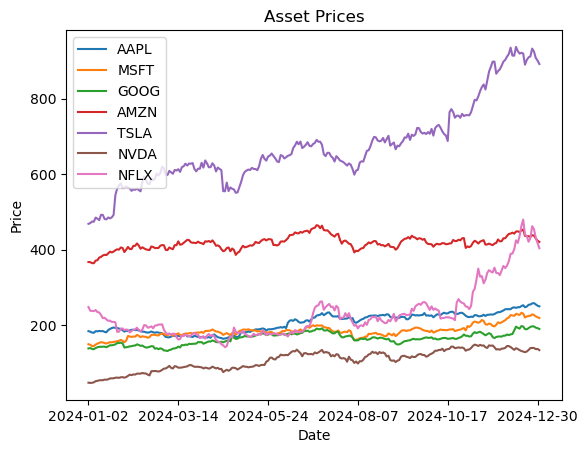

In [23]:
#1. basic visualization of stock prices.
#prices_close_df
prices_close_df = prices_close_df.astype(float) #turn values to float
plot_prices(prices_close_df)

## Making Dates Dynamic 

In [1]:
import pandas as pd
#retrieve data from csv
prices_pdates = pd.read_csv('prices.csv', parse_dates=True)
prices_pdates = prices_pdates.drop([0, 1])
prices_pdates = prices_pdates.rename(columns={'Price': 'Date'})
prices_pdates

,Date,Close,Close.1,Close.2,Close.3,Close.4,Close.5,Close.6,High,High.1,...,Open.4,Open.5,Open.6,Volume,Volume.1,Volume.2,Volume.3,Volume.4,Volume.5,Volume.6
2,2024-01-02,184.53207397460938,149.92999267578125,138.902099609375,367.380615234375,468.5,48.14991760253906,248.4199981689453,187.3153662175252,152.3800048828125,...,483.19000244140625,49.22551389912714,250.0800018310547,82488700,47339400,20071900,25258600,5049400,411254000,104654200
3,2024-01-03,183.15037536621094,148.47000122070312,139.69833374023438,367.1131591796875,470.260009765625,47.551143646240234,238.4499969482422,184.77065219734183,151.0500030517578,...,467.32000732421875,47.46717554449256,244.97999572753906,58414500,49425500,18974300,23083500,3443700,320896000,121082600
4,2024-01-04,180.8243408203125,144.57000732421875,137.38926696777344,364.4781799316406,474.6700134277344,47.979984283447266,237.92999267578125,181.99729114451387,147.3800048828125,...,472.9800109863281,47.74906818641796,239.25,71983600,56039800,18253300,20901500,3636500,306535000,102629300
5,2024-01-05,180.0987091064453,145.24000549316406,136.74232482910156,364.28997802734375,474.05999755859375,49.07856369018555,237.49000549316406,181.66928147459845,146.58999633789062,...,476.5,48.4438038170967,236.86000061035156,62303300,45124800,15433200,20987000,2612500,415039000,92379400
6,2024-01-08,184.4525604248047,149.10000610351562,139.8675079345703,371.1646728515625,485.0299987792969,52.23337936401367,240.4499969482422,184.49233019548157,149.39999389648438,...,473.8900146484375,49.493411188465835,236.13999938964844,59144500,46757100,17645300,23134000,3675800,642510000,85166600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,2024-12-24,257.91644287109375,229.0500030517578,197.34518432617188,438.4508361816406,932.1199951171875,140.2071075439453,462.2799987792969,257.92641115938613,229.13999938964844,...,915.0,139.98712655305678,435.8999938964844,23234700,15007500,6809800,7164500,2320300,105157000,59551800
250,2024-12-26,258.7355041503906,227.0500030517578,196.87571716308594,437.2332763671875,924.1400146484375,139.91712951660156,454.1300048828125,259.81433504408284,228.5,...,928.4000244140625,139.68715493157526,465.1600036621094,27237100,16146700,7907900,8194200,2340300,116205600,76366400
251,2024-12-27,255.30929565429688,223.75,193.81918334960938,429.66845703125,907.5499877929688,136.9973907470703,431.6600036621094,258.41589596104086,226.02999877929688,...,916.010009765625,138.53725762424156,449.5199890136719,42355300,27367100,14693000,18117700,3226200,170582600,82666800
252,2024-12-30,251.9230194091797,221.3000030517578,192.47073364257812,423.9798583984375,900.4299926757812,137.47735595703125,417.4100036621094,253.22159473829512,223.0,...,894.510009765625,134.81759702407376,419.3999938964844,35557500,28321200,12209500,13158700,2203000,167734700,64941000


In [7]:
from datetime import datetime
# prices_pdates.columns
prices_pdates_out = prices_pdates['Date']
prices_pdates_list= prices_pdates_out.tolist()
print(type(prices_pdates_list[0]))
prices_pdates_list_e1 =datetime.strptime(prices_pdates_list[0], '%Y-%m-%d') #Transform the first date to datetime object
prices_pdates_list_e1


<class 'str'>


datetime.datetime(2024, 1, 2, 0, 0)

In [ ]:
#turn values in Date column to datetime objects (PANDAS METHOD)
prices_pdates['Date_a'] = pd.to_datetime(prices_pdates['Date'])


In [ ]:
# Convert the 'Date' column to datetime objects (PYTHON METHOD)
prices_pdates['Date_ b'] = prices_pdates['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))  # Format to string

In [ ]:
# check the type of the first element in the 'Date' columns
print(type(prices_pdates['Date_a'].to_list()[0]))  # PANDAS METHOD
print(type(prices_pdates['Date_ b'].to_list()[0]))  # PYTHON METHOD

#both work. Need to change the code to use dynamic dates. 

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


# Backtester 1.0

In [ ]:
# Bring it all together for a 1.0 version. 
